In [2]:
#scikit-image: libreria para el procesamiento de imágenes
from skimage import img_as_bool, io, color, morphology

################
# Binarización #
################
image = img_as_bool(color.rgb2gray(io.imread('nanofibers.png')))
image

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:131: UserWarning: Possible sign loss when converting negative image of type float64 to positive image of type bool.
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to bool
  .format(dtypeobj_in, dtypeobj_out))


array([[ True,  True,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

In [3]:
# Esqueletización y mapa de distancia
skeleton, distance = morphology.medial_axis(image, mask=None, return_distance=True)
skeleton

array([[ True,  True,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

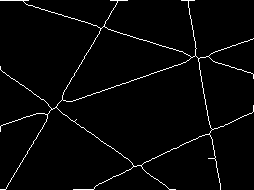

In [6]:
# mostrando el esqueleto
import numpy as np
from google.colab.patches import cv2_imshow

def cv2_imshow_bin(img):
  cv2_imshow(np.where(img==True, 255, img))
  
cv2_imshow_bin(skeleton)

In [7]:
############
# Thinning #
############
thinned = morphology.thin(image)
thinned

array([[ True,  True,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

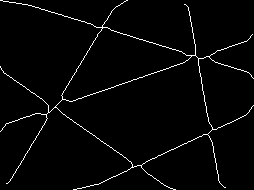

In [8]:
# mostrando thinning
cv2_imshow_bin(thinned)

In [10]:
!pip install mahotas

     |████████████████████████████████| 1.5MB 4.8MB/s 
  Created wheel for mahotas: filename=mahotas-1.4.7-cp36-cp36m-linux_x86_64.whl size=4262385 sha256=32f4609a98699326526e2917e7235d8c67734516a35bc1d35a001021d3c95950
  Stored in directory: /root/.cache/pip/wheels/bb/0d/1e/c012eda7a9bb738a2fc531551681d680d31001abac3e14f3ed
Successfully built mahotas


In [11]:
# Mahotas: Mahotas is a computer vision and image processing library for Python.
import mahotas as mh

############
# Prunning #
############

def branchedPoints(skel):
    branch1=np.array([[2, 1, 2], [1, 1, 1], [2, 2, 2]])
    branch2=np.array([[1, 2, 1], [2, 1, 2], [1, 2, 1]])
    branch3=np.array([[1, 2, 1], [2, 1, 2], [1, 2, 2]])
    branch4=np.array([[2, 1, 2], [1, 1, 2], [2, 1, 2]])
    branch5=np.array([[1, 2, 2], [2, 1, 2], [1, 2, 1]])
    branch6=np.array([[2, 2, 2], [1, 1, 1], [2, 1, 2]])
    branch7=np.array([[2, 2, 1], [2, 1, 2], [1, 2, 1]])
    branch8=np.array([[2, 1, 2], [2, 1, 1], [2, 1, 2]])
    branch9=np.array([[1, 2, 1], [2, 1, 2], [2, 2, 1]])
    br1=mh.morph.hitmiss(skel,branch1)
    br2=mh.morph.hitmiss(skel,branch2)
    br3=mh.morph.hitmiss(skel,branch3)
    br4=mh.morph.hitmiss(skel,branch4)
    br5=mh.morph.hitmiss(skel,branch5)
    br6=mh.morph.hitmiss(skel,branch6)
    br7=mh.morph.hitmiss(skel,branch7)
    br8=mh.morph.hitmiss(skel,branch8)
    br9=mh.morph.hitmiss(skel,branch9)
    return br1+br2+br3+br4+br5+br6+br7+br8+br9

def endPoints(skel):
    endpoint1=np.array([[0, 0, 0],
                        [0, 1, 0],
                        [2, 1, 2]])
    
    endpoint2=np.array([[0, 0, 0],
                        [0, 1, 2],
                        [0, 2, 1]])
    
    endpoint3=np.array([[0, 0, 2],
                        [0, 1, 1],
                        [0, 0, 2]])
    
    endpoint4=np.array([[0, 2, 1],
                        [0, 1, 2],
                        [0, 0, 0]])
    
    endpoint5=np.array([[2, 1, 2],
                        [0, 1, 0],
                        [0, 0, 0]])
    
    endpoint6=np.array([[1, 2, 0],
                        [2, 1, 0],
                        [0, 0, 0]])
    
    endpoint7=np.array([[2, 0, 0],
                        [1, 1, 0],
                        [2, 0, 0]])
    
    endpoint8=np.array([[0, 0, 0],
                        [2, 1, 0],
                        [1, 2, 0]])
    
    ep1=mh.morph.hitmiss(skel,endpoint1)
    ep2=mh.morph.hitmiss(skel,endpoint2)
    ep3=mh.morph.hitmiss(skel,endpoint3)
    ep4=mh.morph.hitmiss(skel,endpoint4)
    ep5=mh.morph.hitmiss(skel,endpoint5)
    ep6=mh.morph.hitmiss(skel,endpoint6)
    ep7=mh.morph.hitmiss(skel,endpoint7)
    ep8=mh.morph.hitmiss(skel,endpoint8)
    ep = ep1+ep2+ep3+ep4+ep5+ep6+ep7+ep8
    return ep

def pruning(skeleton, size):
    '''remove iteratively end points "size" 
       times from the skeleton
    '''
    for i in range(0, size):
        endpoints = endPoints(skeleton)
        endpoints = np.logical_not(endpoints)
        skeleton = np.logical_and(skeleton,endpoints)
    return skeleton
  
prunned = pruning(skeleton,100)
prunned


array([[ True,  True,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

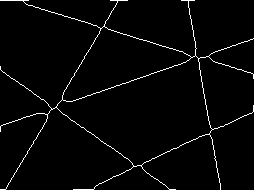

In [12]:
cv2_imshow_bin(prunned)

In [22]:
prunned2 = pruning(thinned,3)
prunned2

array([[ True,  True,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

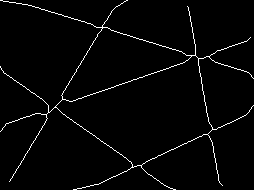

In [23]:
cv2_imshow_bin(prunned2)

In [24]:
###############################
# Transformación de distancia #
###############################

distance

array([[1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [5.        , 5.09901951, 5.38516481, ..., 0.        , 0.        ,
        0.        ],
       [6.        , 6.08276253, 6.32455532, ..., 0.        , 0.        ,
        0.        ],
       [7.        , 7.07106781, 7.28010989, ..., 0.        , 0.        ,
        0.        ]])

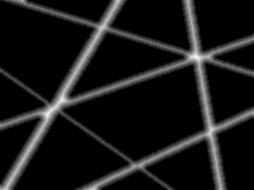

In [26]:
# Open Source Computer Vision Library
import cv2

distanceMapNormalized = distance.copy()
cv2.normalize(distance, distanceMapNormalized, 0, 255, cv2.NORM_MINMAX)
cv2_imshow(distanceMapNormalized)

In [30]:
# detección de intersecciones

def neighbours(x,y,image):
    """Return 8-neighbours of image point P1(x,y), in a clockwise order"""
    img = image
    x_1, y_1, x1, y1 = x-1, y-1, x+1, y+1;
    return [ img[x_1][y], img[x_1][y1], img[x][y1], img[x1][y1], img[x1][y], img[x1][y_1], img[x][y_1], img[x_1][y_1] ]
  
#out2,neighbours(0,0,out2)
#out2[-1][1]
#out2.shape, out2[190][0]

def getSkeletonIntersection(skeleton):
    """ Given a skeletonised image, it will give the coordinates of the intersections of the skeleton.
    
    Keyword arguments:
    skeleton -- the skeletonised image to detect the intersections of
    
    Returns: 
    List of 2-tuples (x,y) containing the intersection coordinates
    """
    # A biiiiiig list of valid intersections             2 3 4
    # These are in the format shown to the right         1 C 5
    #                                                    8 7 6 
    validIntersection = [[0,1,0,1,0,0,1,0],[0,0,1,0,1,0,0,1],[1,0,0,1,0,1,0,0],
                         [0,1,0,0,1,0,1,0],[0,0,1,0,0,1,0,1],[1,0,0,1,0,0,1,0],
                         [0,1,0,0,1,0,0,1],[1,0,1,0,0,1,0,0],[0,1,0,0,0,1,0,1],
                         [0,1,0,1,0,0,0,1],[0,1,0,1,0,1,0,0],[0,0,0,1,0,1,0,1],
                         [1,0,1,0,0,0,1,0],[1,0,1,0,1,0,0,0],[0,0,1,0,1,0,1,0],
                         [1,0,0,0,1,0,1,0],[1,0,0,1,1,1,0,0],[0,0,1,0,0,1,1,1],
                         [1,1,0,0,1,0,0,1],[0,1,1,1,0,0,1,0],[1,0,1,1,0,0,1,0],
                         [1,0,1,0,0,1,1,0],[1,0,1,1,0,1,1,0],[0,1,1,0,1,0,1,1],
                         [1,1,0,1,1,0,1,0],[1,1,0,0,1,0,1,0],[0,1,1,0,1,0,1,0],
                         [0,0,1,0,1,0,1,1],[1,0,0,1,1,0,1,0],[1,0,1,0,1,1,0,1],
                         [1,0,1,0,1,1,0,0],[1,0,1,0,1,0,0,1],[0,1,0,0,1,0,1,1],
                         [0,1,1,0,1,0,0,1],[1,1,0,1,0,0,1,0],[0,1,0,1,1,0,1,0],
                         [0,0,1,0,1,1,0,1],[1,0,1,0,0,1,0,1],[1,0,0,1,0,1,1,0],
                         [1,0,1,1,0,1,0,0]];
    image = skeleton.copy();
    #image = image/255;
    intersections = list();
    for x in range(1,len(image)-1):
        for y in range(1,len(image[x])-1):
            # If we have a white pixel
            if image[x][y] == 1:
                neighbours1 = neighbours(x,y,image);
                valid = True;
                if neighbours1 in validIntersection:
                    intersections.append((y,x));
    # Filter intersections to make sure we don't count them twice or ones that are very close together
    for point1 in intersections:
        for point2 in intersections:
            if (((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2) < 10**2) and (point1 != point2):
                intersections.remove(point2);
    # Remove duplicates
    intersections = list(set(intersections));
    return intersections;
  
intersecciones = getSkeletonIntersection(prunned2)
intersecciones  

[(132, 167),
 (62, 99),
 (103, 27),
 (195, 55),
 (55, 107),
 (46, 114),
 (212, 129),
 (209, 56)]

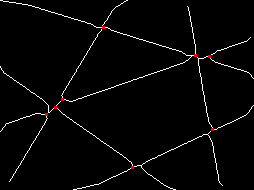

In [31]:
# mostrando las intersecciones

RGB = np.zeros((prunned2.shape[0],prunned2.shape[1],3), dtype=np.uint8)
RGB[prunned2]  = [255,255,255]
RGB[~prunned2] = [0,0,0]

#cv2_imshow(RGB)
#RGB.shape
#RGB[0,0]

for cross in intersecciones:
  #thinnedInter[cross[1]][cross[0]] = False
  x = cross[1]
  y = cross[0]
  x_1, y_1, x1, y1 = x-1, y-1, x+1, y+1; 
  #vecinos = neighbours(cross[1],cross[0],thinned)
  #print(vecinos)
  RGB[x,y] = [0,0,255]
  RGB[x_1,y] = [0,0,255]
  RGB[x_1,y1] = [0,0,255]
  RGB[x][y1] = [0,0,255]
  RGB[x1][y1] = [0,0,255]
  RGB[x1][y] = [0,0,255]
  RGB[x1][y_1] = [0,0,255]
  RGB[x][y_1] = [0,0,255]
  RGB[x_1][y_1] = [0,0,255]
  
cv2_imshow(RGB)

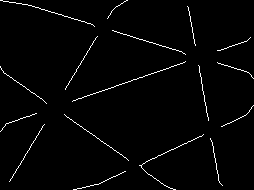

In [32]:
# ancho de intersecciones

def removeCross(cross, distanceMap, thinned):

  width = distanceMap[cross[1]][cross[0]]

  width = width.astype('uint8')

  for x in range(0,width*2+1):
    for y in range(0,width*2+1):
      #print(x - width, y - width)

      i = cross[1] - width + x
      j = cross[0] - width + y

      thinned[i][j] = False
      
  return thinned 

#cross = intersecciones[0]

uncrossed = prunned2.copy()

for cross in intersecciones:
  uncrossed = removeCross(cross, distance, uncrossed)
    
cv2_imshow(np.where(uncrossed==True, 255, uncrossed))

In [34]:
# conteo de pixeles

rows,cols = uncrossed.shape

diameters = dict()

for x in range(0, rows):
    for y in range(0, cols):
      #print(uncrossed[x][y])
      if(uncrossed[x,y]):
        # obtener ancho
        #print(distanceMap[x,y].astype('uint8')*2)
        diameter = distance[x,y].astype('uint8')*2
        
        if(diameter in diameters):
          diameters[diameter]+=1
        else:
          diameters[diameter]=1
        #else:
        #  diameters[diameter] += 1
        #print(diameter)
        
        
diameters

{2: 28, 4: 102, 6: 79, 8: 190, 10: 258, 12: 131, 14: 190}

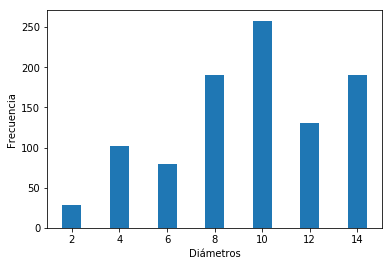

In [35]:
#histograma del diametros en pxs

import matplotlib.pyplot as plt

plt.bar(list(diameters.keys()), diameters.values())
plt.ylabel('Frecuencia')
plt.xlabel('Diámetros')
plt.show()